@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software}
        }

In [1]:
# General-level imports:
import os
import datetime

import numpy as np
import pandas as pd

# For data-reading capabilities:
from seppy.tools import Event

# Importing the Regression-Onset tool:
import regression_onset_tool as reg

### Use either SEPpy to acquire the desired data, or directly choose your own file below:

In [11]:
import seppy.tools.widgets as w
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'), …

Dropdown(description='Sensor:', options=('isois-epihi', 'isois-epilo'), value='isois-epihi')

Dropdown(description='Viewing:', options=('A', 'B'), value='A')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

In [2]:
# To download (or load if files are locally present) SEPpy data, one needs to provide a time span.
start_date = datetime.datetime(2022, 1, 20)
end_date =  datetime.datetime(2022, 1, 21)

# Initializes the SEPpy Event object
seppy_data = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, species=w.species_drop.value,
                     start_date=start_date, end_date=end_date, data_level="l2",
                     data_path="data/", viewing=w.view_drop.value)

# Exports the data to a pandas dataframe
df = reg.externals.export_seppy_data(event=seppy_data)

NameError: name 'w' is not defined

## If you used SEPpy to acquire data, do not run the next cell

In [3]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 2

filename = f"{path}{filenames[index]}"

df = pd.read_csv(filename, parse_dates=True, index_col=index_col_names[index])

In [4]:
# Check the dataframe
display(df)

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:30.451561,NaN,610.8765,0.0000,2319.62160,831.95230,403.3569,0.00000,577.58466,457.06552,219.21864,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.866673,45.647266,50.158504,0.00000
2022-01-20 00:01:30.451561,NaN,1221.7530,0.0000,927.84863,415.97614,403.3569,299.53607,577.58466,0.00000,0.00000,...,51.61536,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2022-01-20 00:02:30.451561,NaN,1221.7530,491.7059,927.84863,0.00000,806.7138,0.00000,0.00000,228.53276,0.00000,...,0.00000,0.000000,43.441692,0.000000,0.000000,0.000000,0.000000,45.647266,0.000000,60.36797
2022-01-20 00:03:30.451561,NaN,0.0000,983.4118,463.92432,1663.90450,1210.0707,0.00000,577.58466,228.53276,0.00000,...,0.00000,46.115623,0.000000,38.311687,0.000000,35.854694,0.000000,45.647266,0.000000,0.00000
2022-01-20 00:04:30.451561,NaN,610.8765,983.4118,1391.77300,831.95230,1210.0707,599.07214,577.58466,228.53276,438.43730,...,0.00000,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,45.647266,50.158504,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:55:30.451561,NaN,2443.5060,983.4118,2319.62160,1247.92830,1210.0707,599.07214,1443.96150,0.00000,438.43730,...,51.61536,92.231250,86.883385,0.000000,79.480675,35.854694,37.866673,136.941800,100.317010,120.73594
2022-01-21 23:56:30.451561,NaN,1832.6294,1966.8236,1855.69730,415.97614,2016.7845,299.53607,1443.96150,457.06552,657.65594,...,51.61536,46.115623,0.000000,38.311687,79.480675,35.854694,75.733345,136.941800,50.158504,482.94376
2022-01-21 23:57:30.451561,NaN,1221.7530,2458.5295,927.84863,1247.92830,2823.4985,1497.68030,577.58466,1142.66380,438.43730,...,154.84608,46.115623,130.325070,38.311687,0.000000,71.709390,75.733345,45.647266,250.792510,0.00000


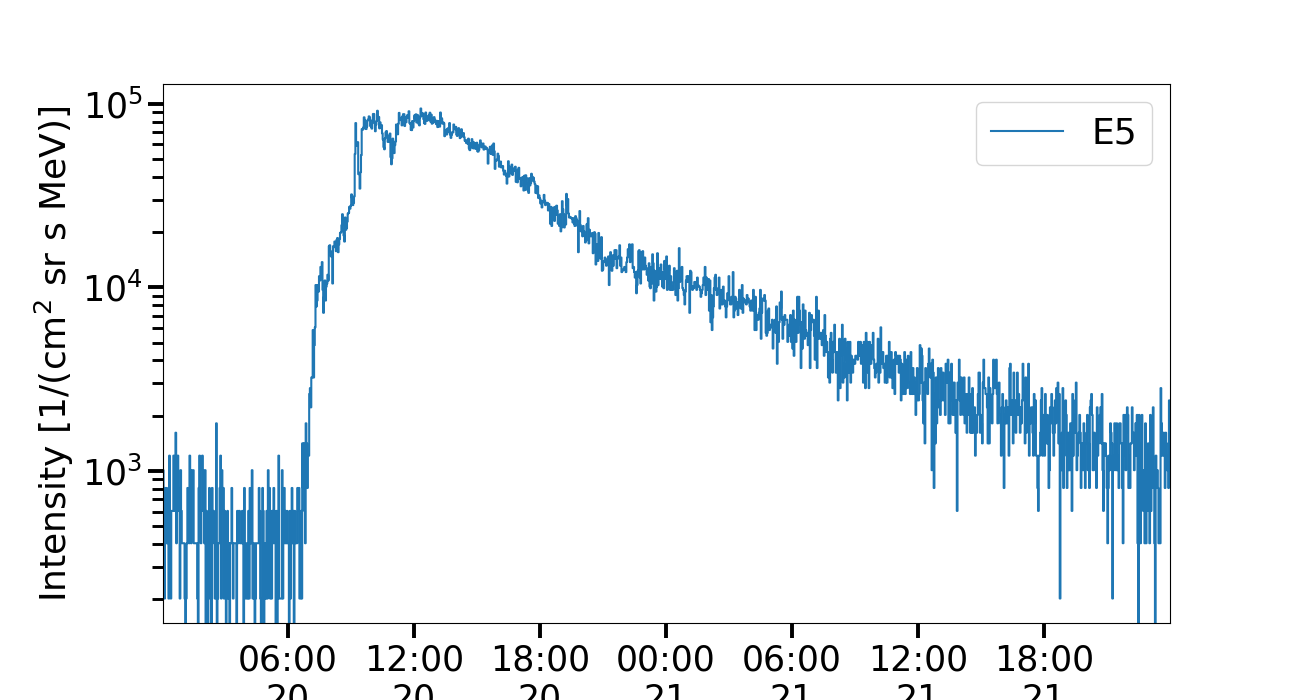

In [5]:
# Initializing the tool with input data
event = reg.Reg(data=df)

# Choose the channel(s) to examine in quicklook plot
channel = "E5" #"Electron_Flux_5"

# 
%matplotlib ipympl
event.quicklook(channel=channel, resample="2 min") #selection=["2022-01-20 02:00", "2022-01-20 12:00"]

Data selection: 2022-01-20 00:01:00.451561, 2022-01-20 19:19:00.451561
Regression converged: True


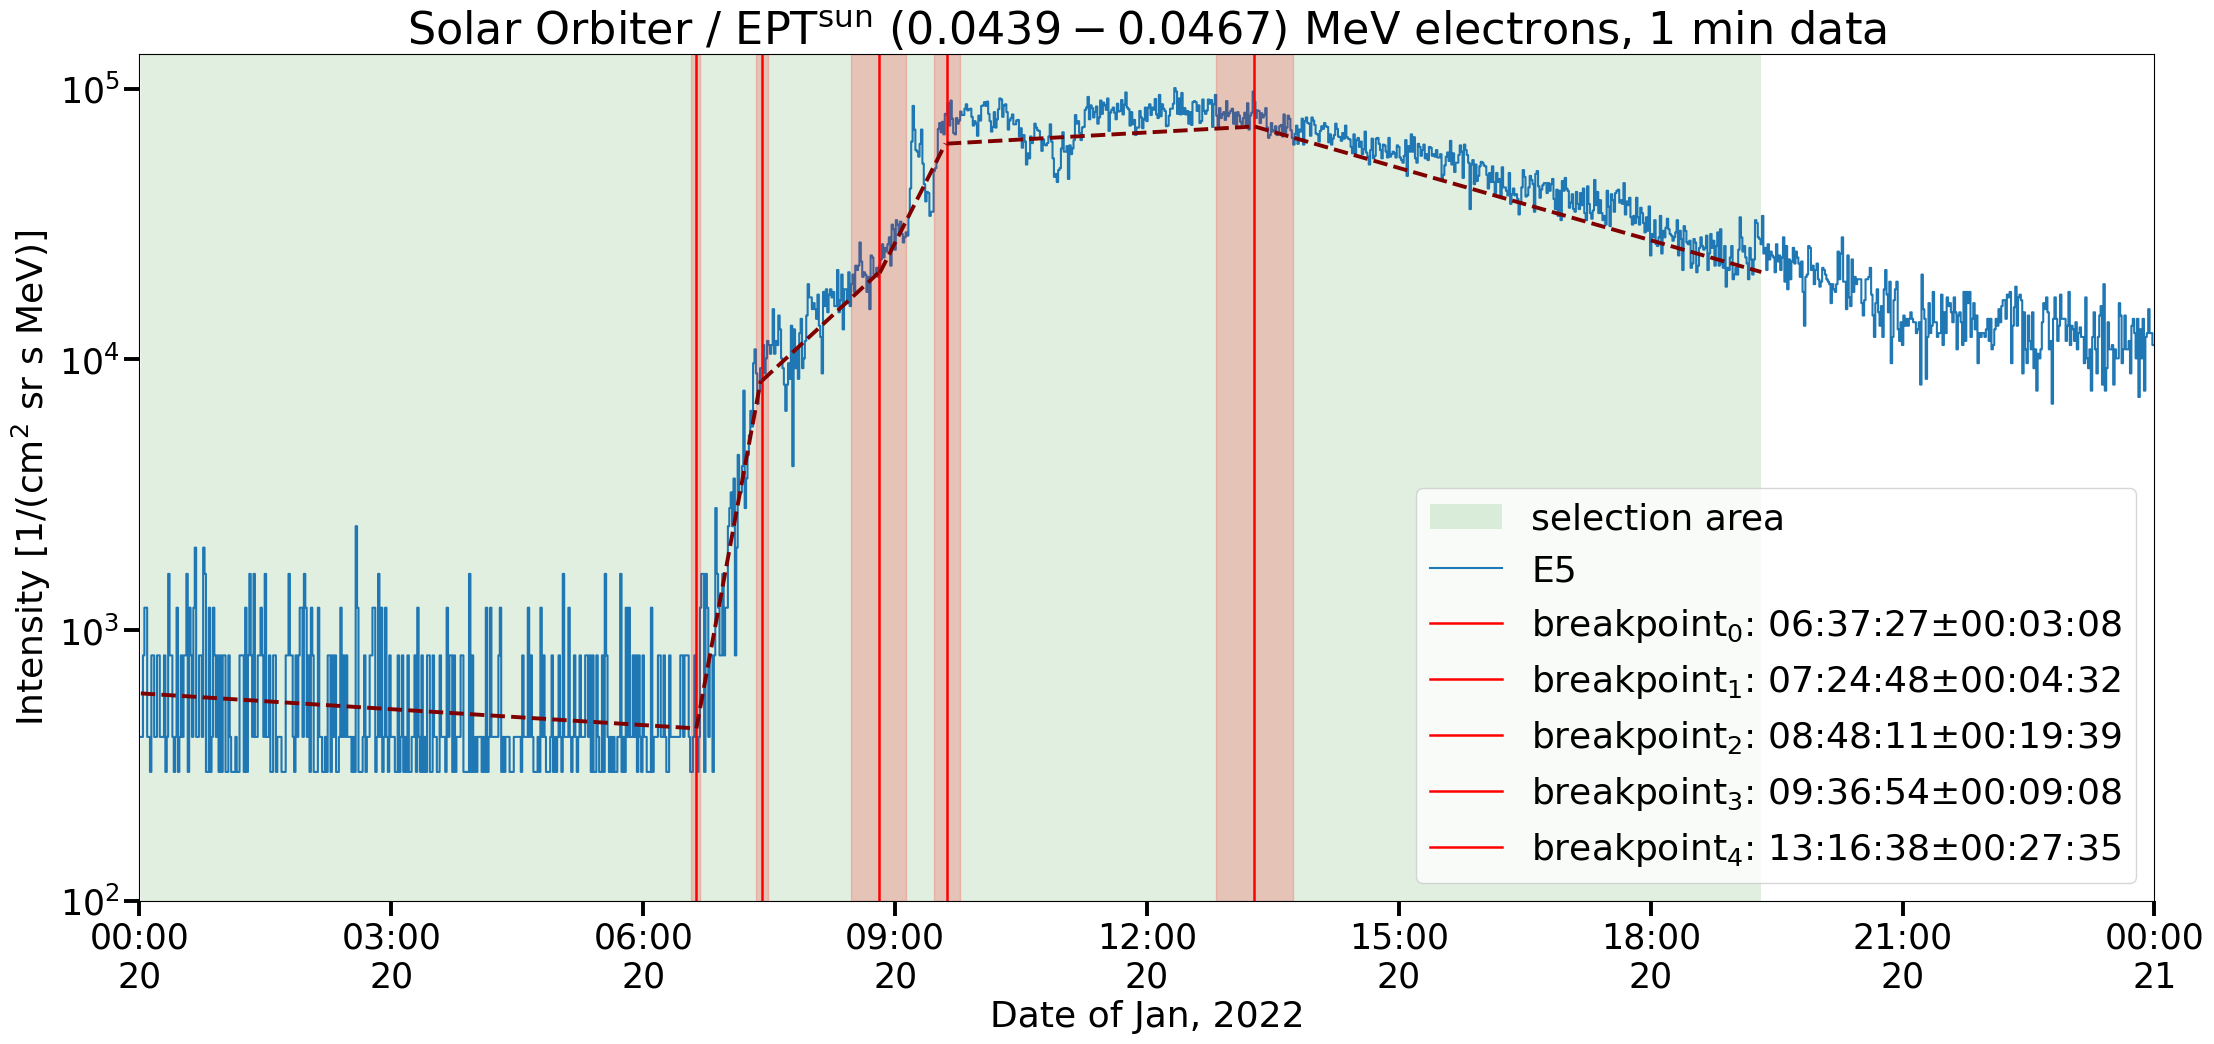

In [8]:
# Title for the figure (optional)
title = r"Solar Orbiter / EPT$^{\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data"

# The channel to consider
#channel = "E5"

# The number of breakpoints to seek from the data selection
num_of_breaks = 5

%matplotlib inline
results  = event.find_breakpoints(channel=channel, breaks=num_of_breaks, fill_zeroes=True,
                                  xlim=["2022-01-20 00:00", "2022-01-21 00:00"], 
                                  title=title, diagnostics=True, resample="1 min")

## Display the results:
#### the results are a dictionary that contains the parameters of the fits (constant and slopes), the breakpoints and their 95% confidence intervals, the figure and its axes.

In [7]:
display(results)

{'const': np.float64(9755.26659338214),
 'alpha0': np.float64(-5.9370429550518e-06),
 'alpha1': np.float64(0.00042960777342515355),
 'alpha2': np.float64(7.989073595438272e-05),
 'alpha3': np.float64(0.00016909500532485082),
 'alpha4': np.float64(4.7812355641698215e-06),
 'alpha5': np.float64(-2.4743578329359788e-05),
 'breakpoint0': Timestamp('2022-01-20 06:37:38.935914278'),
 'breakpoint1': Timestamp('2022-01-20 07:25:55.970487118'),
 'breakpoint2': Timestamp('2022-01-20 08:48:06.855159760'),
 'breakpoint3': Timestamp('2022-01-20 09:36:56.617960453'),
 'breakpoint4': Timestamp('2022-01-20 13:16:48.545119524'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:34:29.974647522'),
  Timestamp('2022-01-20 06:40:47.897181034')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:21:37.995293140'),
  Timestamp('2022-01-20 07:30:13.945681095')),
 'breakpoint2_errors': (Timestamp('2022-01-20 08:30:48.331659555'),
  Timestamp('2022-01-20 09:05:25.378659964')),
 'breakpoint3_errors': (Timestamp('

## Saving the figure:

In [7]:
figure_name = "name_for_your_figure.png"

reg.externals.save_figure(results=results, name=figure_name)